<a href="https://colab.research.google.com/github/rjz46/Cornell-Conversational-Analysis-Toolkit/blob/master/datasets/reddit_coarse_discourse-corpus/A1E_Upvote_Toxicity_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and setup

In [0]:
from IPython.display import display as disp
from zipfile import ZipFile
import json
import matplotlib.pyplot as plt
import pandas as pd
import os
import collections

from collections import defaultdict

print("""\n***IGNORE ANY ERROR about 'reload_ext' - for some reason it breaks 
autoreload and it's not necessary. \n\n""")
%load_ext autoreload


***IGNORE ANY ERROR about 'reload_ext' - for some reason it breaks 
autoreload and it's not necessary. 




In [51]:
#@title Change working dir if necessary before importing convokit

# UNCOMMENT AND RUN ONCE PER KERNEL, listdir() output should include "convokit"
# os.chdir('../..')

print(os.listdir())

['LICENSE.md', 'convokit', '.DS_Store', 'requirements.txt', 'Makefile', 'website', 'datasets', 'tests', 'venv_c', 'README.md', 'setup.py', '.gitignore', 'CONTRIBUTING.md', 'examples', 'doc', '.git']


In [0]:
import convokit
from convokit import Toxicity

In [0]:
# Reload convokit (and any other module) after making local changes.
print("""\n***If you see a StopIteration error, run this cell again.\n\n""")
%autoreload


***If you see a StopIteration error, run this cell again.




# Load dataset and transform

In [0]:
reddit_corpus = convokit.Corpus(filename="datasets/reddit_coarse_discourse-corpus/corpus")

In [0]:
tox = Toxicity(toxicity_json_path="convokit/toxicity/data/reddit_coarse_discourse.json")
tox.transform(reddit_corpus)

# Sequences

In [0]:
subreddit_counter = collections.Counter()
convos = reddit_corpus.conversations


for convoutt in convos: 
    #print(convos[convoutt])
    subrd = convos[convoutt].meta["subreddit"]
    subreddit_counter.update({subrd:1})
top_25_subreddits = dict(subreddit_counter.most_common(25))

print(top_25_subreddits.keys())

dict_keys(['askreddit', 'leagueoflegends', 'buildapc', 'explainlikeimfive', 'trees', 'pcmasterrace', 'gaming', 'techsupport', 'electronic_cigarette', 'relationships', 'tipofmytongue', 'hearthstone', 'atheism', 'jailbreak', 'summonerschool', 'personalfinance', 'reddit.com', 'whowouldwin', 'destinythegame', 'movies', 'pokemon', 'starcraft', 'malefashionadvice', 'askscience', 'loseit'])


In [0]:
top_level_posts = {}
counter = 0
in_top_25 = {}

for x in convos:
    if convos[x].meta["subreddit"] in top_25_subreddits.keys():
        in_top_25[x] = convos[x]

In [0]:
utts = reddit_corpus.utterances

print(len(in_top_25))

2021


# Upvotes

In [0]:
utt_ups_tox = {}
upsvalues = []
toxvalues = []

for x in convos:
    if not utts[x].meta['ups'] == None:
        utt_ups_tox[x] = [utts[x].meta['ups'], utts[x].meta['toxicity']]
        upsvalues.append(utts[x].meta['ups'])
        toxvalues.append(utts[x].meta['toxicity'])
    else:
        utt_ups_tox[x] = [0, utts[x].meta['toxicity']]
        upsvalues.append(0)
        toxvalues.append(utts[x].meta['toxicity'])

print(list(convos.items())[10])

('t3_289m0u', Conversation({'_owner': <convokit.model.corpus.Corpus object at 0x7fda7060f0b8>, '_id': 't3_289m0u', '_utterance_ids': ['t3_289m0u', 't1_ci8sl95', 't1_ci8ui3k', 't1_ci8ub9d'], '_usernames': None, '_meta': {'subreddit': '2007scape', 'url': 'https://www.reddit.com/r/2007scape/comments/289m0u/i_played_2007scape_when_it_was_first_released/', 'title': "I played 2007scape when it was first released, what's changed since then?", 'averagetoxicity': 0.04370849525}}))


Text(0.5, 0, 'Toxicity Score')

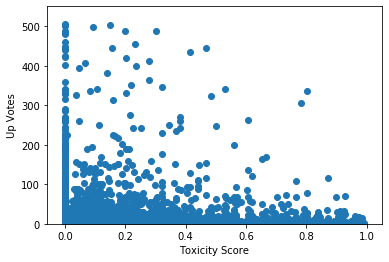

In [0]:
#print(utt_ups_tox)
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

bestfit = np.polyfit(toxvalues, upsvalues,1)
bestfitline = np.poly1d(bestfit)

plt.scatter(toxvalues, upsvalues)
plt.ylim(0,550)
plt.ylabel('Up Votes')
plt.xlabel('Toxicity Score')


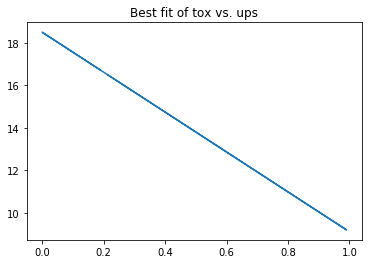

In [0]:
plt.title("Best fit of tox vs. ups")
plt.plot(toxvalues, bestfitline(toxvalues))

In [0]:
print(pearsonr(toxvalues,upsvalues)[0])

-0.014165836438686597


In [0]:
upstox_25 = {}
ups_25 = defaultdict(list)
tox_25 = defaultdict(list)

for x in in_top_25:
    if not utts[x].meta['ups'] == None:
        upstox_25[x +"." + convos[x].meta["subreddit"]] = [utts[x].meta['ups'], utts[x].meta['toxicity']]
        ups_25[convos[x].meta["subreddit"]].append(utts[x].meta['ups'])
        tox_25[convos[x].meta["subreddit"]].append(utts[x].meta['toxicity'])
    else:
        upstox_25[x +"." + convos[x].meta["subreddit"]] = [0, utts[x].meta['toxicity']]
        ups_25[convos[x].meta["subreddit"]].append(0)
        tox_25[convos[x].meta["subreddit"]].append(utts[x].meta['toxicity'])
corr_25 = {}

for x in ups_25:
    corr_25[x] = pearsonr(tox_25[x],ups_25[x])[0]
   
sorted_corr = sorted(corr_25.items(), key=lambda kv: kv[1])
for x in sorted_corr:
    print(x)

('starcraft', -0.27384032357600807)
('atheism', -0.22348513909807635)
('explainlikeimfive', -0.13939416840791383)
('askscience', -0.10956977150863109)
('trees', -0.09727628835606086)
('hearthstone', -0.0970309933426117)
('tipofmytongue', -0.09066037183271945)
('buildapc', -0.07521749787184404)
('leagueoflegends', -0.06775391921410352)
('jailbreak', -0.06285257687786554)
('gaming', -0.041727481525480344)
('askreddit', -0.02767994907134295)
('electronic_cigarette', -0.02331297129980621)
('whowouldwin', 0.00402234714291879)
('pcmasterrace', 0.00446416832200411)
('personalfinance', 0.007126925299185703)
('malefashionadvice', 0.04441819503811307)
('loseit', 0.06596538002773104)
('summonerschool', 0.10341093480314038)
('pokemon', 0.11008570857269556)
('relationships', 0.1204720997965011)
('destinythegame', 0.12438564649784901)
('reddit.com', 0.13082806745092074)
('movies', 0.13592512094621084)
('techsupport', 0.14165529303857546)


# E3: Run on another dataset

## Test on reddit-small

In [43]:
# Load "reddit-corpus-small"
small_reddit_corpus_raw = convokit.Corpus(convokit.download("reddit-corpus-small"))

Dataset already exists at /Users/katyblumer/.convokit/downloads/reddit-corpus-small


In [44]:
#@title Subsample dataset
num_convos = 100 #@param

sampled_utts = []
convo_sample_ids = small_reddit_corpus_raw.get_conversation_ids()[:num_convos]
for idx in convo_sample_ids:
  convo = small_reddit_corpus_raw.get_conversation(idx)
  for utt_id in convo.get_utterance_ids():
    sampled_utts.append(convo.get_utterance(utt_id))
small_reddit_corpus = convokit.Corpus(utterances=sampled_utts)
print("Sampled corpus with {} convos and {} utterances".format(len(small_reddit_corpus.get_conversation_ids()), len(small_reddit_corpus.get_utterance_ids())))

Sampled corpus with 100 convos and 3932 utterances


In [0]:
# RERUN THIS CELL if you change anything in your local convoikit, then you don't 
# have to restart the kernel. 
# If you get a StopIteration error on the first run, that means it's working - just run the cell again. 

# If you don't, then either your file hasn't changed or autoreload has stopped 
# working (sometimes it stops working until you restart the kernel... seems to 
# be when you use reload_ext instead of load_ext????)
%autoreload

In [48]:
reload_from_api = False
if reload_from_api:
  tox_small_reddit = convokit.Toxicity(api_key="Not currently used - is hardcoded", toxicity_path_to_save="convokit/toxicity/data/reddit_small_corpus.json")
else:
  tox_small_reddit = convokit.Toxicity(toxicity_json_path="convokit/toxicity/data/reddit_small_corpus.json")

small_reddit_corpus = tox_small_reddit.transform(small_reddit_corpus)

KeyError: ignored

## IQ2

In [0]:
iq2_corpus = convokit.Corpus(filename="datasets/iq2_corpus")


### Sample

In [58]:
utts = iq2_corpus.utterances
num_convos = None #@param
print(len(utts))

sampled_utts = []
convo_sample_ids = iq2_corpus.get_conversation_ids()
if num_convos:
  convo_sample_ids = convo_sample_ids[:num_convos]
for idx in convo_sample_ids:
  convo = iq2_corpus.get_conversation(idx)
  for utt_id in convo.get_utterance_ids():
    sampled_utts.append(convo.get_utterance(utt_id))
small_iq2_corpus = convokit.Corpus(utterances=sampled_utts)
for idx in convo_sample_ids:
  small_iq2_corpus.get_conversation(idx).meta = iq2_corpus.get_conversation(idx).meta
print("Sampled corpus with {} convos and {} utterances".format(len(small_iq2_corpus.get_conversation_ids()), len(small_iq2_corpus.get_utterance_ids())))

26562
Sampled corpus with 108 convos and 26562 utterances


In [0]:
%autoreload

In [62]:
reload_from_api = False
if reload_from_api:
  tox_small_iq2 = convokit.Toxicity(api_key="Not currently used - is hardcoded", toxicity_path_to_save="convokit/toxicity/data/iq2_corpus.json")
else:
  tox_small_iq2 = convokit.Toxicity(toxicity_json_path="convokit/toxicity/data/iq2_corpus.json")

small_iq2_corpus = tox_small_iq2.transform(small_iq2_corpus)

### Upvotes

In [63]:
for i,x in enumerate(small_iq2_corpus.iter_conversations()):
  print(x)
  if i >= 10:
    break

print(small_iq2_corpus.meta)

Conversation({'_owner': <convokit.model.corpus.Corpus object at 0x7f88b145c588>, '_id': '0', '_utterance_ids': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142

In [65]:
convos_dict = {}
for convo_id in small_iq2_corpus.get_conversation_ids():
  convo = small_iq2_corpus.get_conversation(convo_id)

  # print(convo)
  # print(convo.meta.keys())
  # break
  # print(small_iq2_corpus.get_utterance())

  tox_values.append(convo.meta['averagetoxicity'])
  results = convo.meta['results']

  pre_und = results['pre']['undecided']
  post_und = results['post']['undecided']
  delta_abs = post_und - pre_und
  delta_abs = post_und - pre_und
  row = collections.OrderedDict((
  ('pre_und', pre_und),
  ('post_und', pre_und),
  ('delta_abs', post_und - pre_und),
  # ('delta_pct', 100.0 * (post_und - pre_und)),
  ))
  # print(results)
  # pre_und_pcts.append(['pre']['undecided'] / sum(results.values()))
  # row = {}
  row['tox'] = convo.meta['averagetoxicity']
  if results['breakdown']:
    row.update(results['breakdown'])

  # results = 

  # row.update(convo.meta['results'])
  convos_dict[convo_id] = row

df = pd.DataFrame.from_dict(convos_dict, orient='index')
df.describe()

,pre_und,post_und,delta_abs,tox,against_for,undecided_for,for_against,for_for,undecided_against,for_undecided,undecided_undecided,against_undecided,against_against
count,108.000000,108.000000,108.000000,108.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,30.148148,30.148148,-21.814815,0.126488,6.616279,14.372093,7.197674,25.790698,13.465116,2.395349,4.813953,1.744186,23.790698
std,8.160556,8.160556,7.933306,0.024909,3.791967,5.964272,4.139156,11.903497,5.539249,2.037033,1.918032,1.329035,12.565179
min,8.000000,8.000000,-42.000000,0.082597,0.000000,3.000000,2.000000,9.000000,5.000000,0.000000,1.000000,0.000000,6.000000
25%,24.000000,24.000000,-27.250000,0.105047,4.000000,11.000000,4.750000,17.000000,9.500000,1.000000,3.500000,1.000000,14.000000
50%,31.000000,31.000000,-21.000000,0.121065,6.000000,14.000000,6.000000,22.000000,13.000000,2.000000,5.000000,2.000000,21.000000
75%,35.000000,35.000000,-16.000000,0.143364,9.000000,18.000000,9.000000,35.000000,17.000000,4.000000,6.000000,2.000000,31.500000
max,48.000000,48.000000,-1.000000,0.186613,20.000000,26.000000,20.000000,58.000000,26.000000,9.000000,9.000000,6.000000,53.000000


In [69]:
df.columns

Index(['pre_und', 'post_und', 'delta_abs', 'tox', 'against_for',
       'undecided_for', 'for_against', 'for_for', 'undecided_against',
       'for_undecided', 'undecided_undecided', 'against_undecided',
       'against_against'],
      dtype='object')

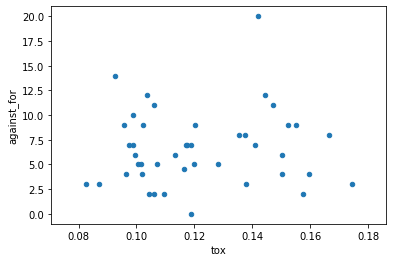

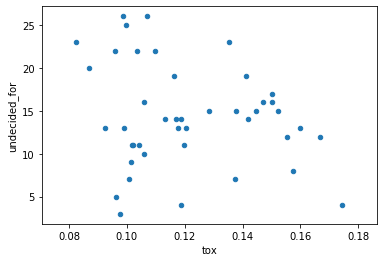

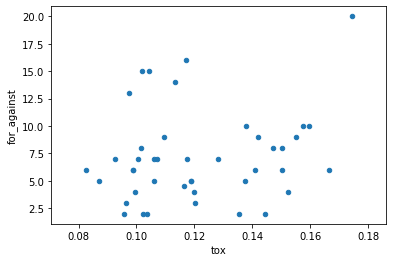

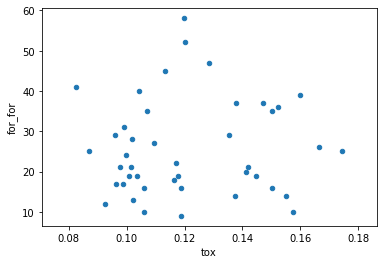

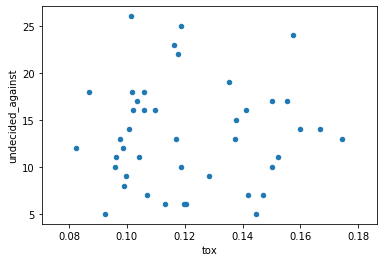

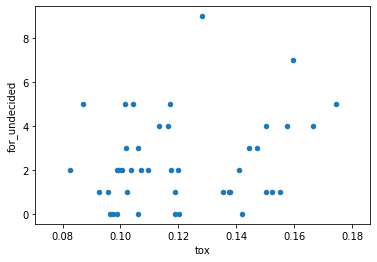

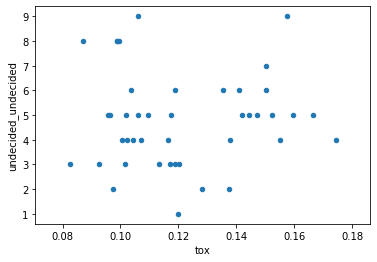

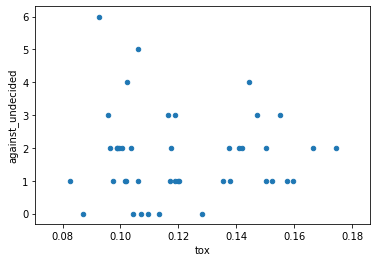

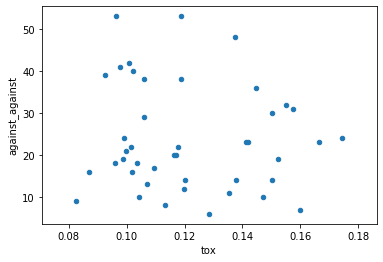

In [70]:
votes = ['for', 'against', 'undecided']

# breakdowns = [
#         'against_for',
#         'undecided_for', 
#         'for_against', 
#         'for_for', 
#         'undecided_against',
#         'for_undecided', 
#         'undecided_undecided', 
#         'against_undecided',
#         'against_against'      
# ]

# len(df[~df.against_for.isna()])
plt.subplots([3,3], figsize=(20, 15))
b_df = df[~df.against_for.isna()]
for start in votes:
  for end in votes:
    
    b = "{}_{}".format(start, end)
  df.plot(x='tox', y=b, kind='scatter')

In [0]:
f

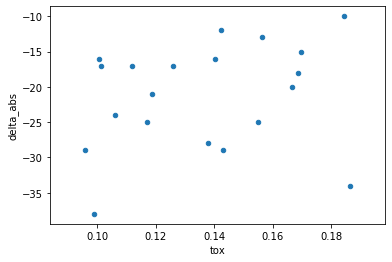

In [0]:
df.plot(x='tox', y='delta_abs', kind='scatter')

Text(0.5, 0, 'Toxicity Score')

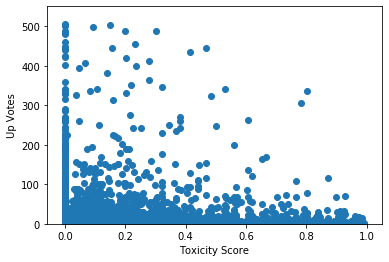

In [0]:
#print(utt_ups_tox)
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

bestfit = np.polyfit(toxvalues, upsvalues,1)
bestfitline = np.poly1d(bestfit)

plt.scatter(toxvalues, upsvalues)
plt.ylim(0,550)
plt.ylabel('Up Votes')
plt.xlabel('Toxicity Score')


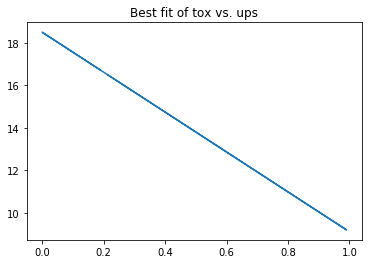

In [0]:
plt.title("Best fit of tox vs. ups")
plt.plot(toxvalues, bestfitline(toxvalues))

In [0]:
print(pearsonr(toxvalues,upsvalues)[0])

-0.014165836438686597


In [0]:
upstox_25 = {}
ups_25 = defaultdict(list)
tox_25 = defaultdict(list)

for x in in_top_25:
    if not utts[x].meta['ups'] == None:
        upstox_25[x +"." + convos[x].meta["subreddit"]] = [utts[x].meta['ups'], utts[x].meta['toxicity']]
        ups_25[convos[x].meta["subreddit"]].append(utts[x].meta['ups'])
        tox_25[convos[x].meta["subreddit"]].append(utts[x].meta['toxicity'])
    else:
        upstox_25[x +"." + convos[x].meta["subreddit"]] = [0, utts[x].meta['toxicity']]
        ups_25[convos[x].meta["subreddit"]].append(0)
        tox_25[convos[x].meta["subreddit"]].append(utts[x].meta['toxicity'])
corr_25 = {}

for x in ups_25:
    corr_25[x] = pearsonr(tox_25[x],ups_25[x])[0]
   
sorted_corr = sorted(corr_25.items(), key=lambda kv: kv[1])
for x in sorted_corr:
    print(x)

('starcraft', -0.27384032357600807)
('atheism', -0.22348513909807635)
('explainlikeimfive', -0.13939416840791383)
('askscience', -0.10956977150863109)
('trees', -0.09727628835606086)
('hearthstone', -0.0970309933426117)
('tipofmytongue', -0.09066037183271945)
('buildapc', -0.07521749787184404)
('leagueoflegends', -0.06775391921410352)
('jailbreak', -0.06285257687786554)
('gaming', -0.041727481525480344)
('askreddit', -0.02767994907134295)
('electronic_cigarette', -0.02331297129980621)
('whowouldwin', 0.00402234714291879)
('pcmasterrace', 0.00446416832200411)
('personalfinance', 0.007126925299185703)
('malefashionadvice', 0.04441819503811307)
('loseit', 0.06596538002773104)
('summonerschool', 0.10341093480314038)
('pokemon', 0.11008570857269556)
('relationships', 0.1204720997965011)
('destinythegame', 0.12438564649784901)
('reddit.com', 0.13082806745092074)
('movies', 0.13592512094621084)
('techsupport', 0.14165529303857546)
